In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# importing te data
data=pd.read_csv('/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part1-DataPreprocessing/Section2,Part1-Data_Preprocessing/Data.csv')

In [45]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [46]:
#features
X=data[['Country', 'Age', 'Salary']]
X.head(3)

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0


In [47]:
# selecting the prediction target
y=data['Purchased']
y.head()

0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

# 1. Data preprocessing

### Taking care of missing data

In [48]:
from sklearn.preprocessing import Imputer

In [49]:
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer=imputer.fit(X[['Age','Salary']]) # fitting imputer object to X
X.iloc[:,1:3]=imputer.transform(X.iloc[:,1:3]) #replace NaN with mean values from columns Age and Salary


/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
X

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


### Encoding categorical values

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [52]:
labelencoder_X=LabelEncoder() # object of class LabelEncoder
X.iloc[:,0]=labelencoder_X.fit_transform(X.iloc[:, 0]) #returns first column of X encoded- 
#it means that if I select first columns I will not have countries' names but numbers 
# there is a problem with this method, because ML equation will compare those values and this is not true that 
# if France has number 0, it is lower that Spain with number 2
# To prevent from this, we are going to use OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0]) #categorical_features=0 -nummber of columns with categorical val
X=onehotencoder.fit_transform(X).toarray() # we don't have to put column number because we specified it above

/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [56]:
# enoding prediction target y
labelencoder_y=LabelEncoder() # object of class LabelEncoder
y=labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting dataset into train and test set

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [63]:
y_test 

array([0, 0])

In [64]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

### Features scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train) # fit the object to training set and then transform it
X_test=sc_X.transform(X_test) #we don't need to to fit it 

In [71]:
y_test

array([0, 0])

In [74]:
features=pd.DataFrame(X_train)

In [75]:
features

,0,1,2,3,4
0,-1.0,2.645751,-0.774597,0.263068,0.123815
1,1.0,-0.377964,-0.774597,-0.253501,0.461756
2,-1.0,-0.377964,1.290994,-1.975398,-1.530933
3,-1.0,-0.377964,1.290994,0.052614,-1.111420
4,1.0,-0.377964,-0.774597,1.640585,1.720297
5,-1.0,-0.377964,1.290994,-0.081312,-0.167514
6,1.0,-0.377964,-0.774597,0.951826,0.986148
7,1.0,-0.377964,-0.774597,-0.597881,-0.482149


# 2. Simple Linear Regression

In [65]:
dataset=pd.read_csv('/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part2-Regression/Section4-Simple_Linear_Regression/Salary_Data.csv')

In [66]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [83]:
#features
X=dataset.iloc[:,0]

#target 
y=dataset.iloc[:,-1]

In [87]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train = X_train.values.reshape(-1,1)

In [69]:
# in linear regression we don't need to tahe care of data scaling. This model will do it for us

In [89]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# predicting the test set results
X_test= X_test.values.reshape(-1,1)
y_pred=regressor.predict(X_test) 

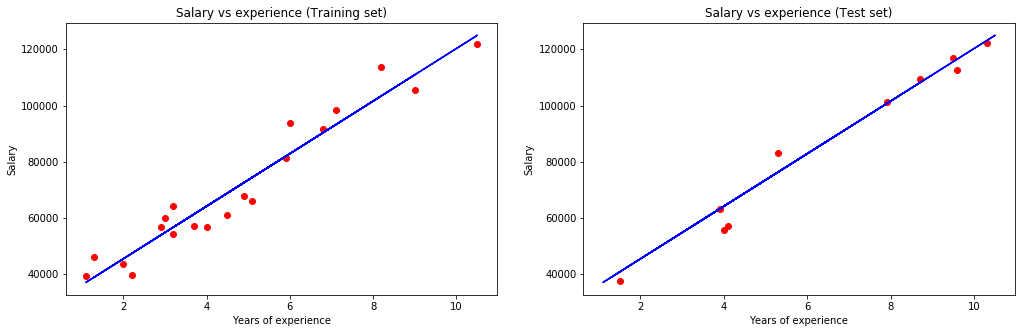

In [93]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.2)

# visualising the training test results
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs experience (Training set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

# visualising the test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # trend line is the same as above because I want to see
#how far are predicted values from trend line
plt.title('Salary vs experience (Test set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')


plt.show()

### exercise-predicting prices of apartments using Linear Regression
- in this exercise I will predict apartment's prices depending od their surface

In [157]:
import pandas as pd
prices=pd.read_excel('/home/kinga/python/baza_bez_outliers.xlsx')
prices.columns

Index(['Unnamed: 0', 'index', 'Adres', 'Cena', 'Cena_lokalu', 'Cena_zł/m2',
       'Data_transakcji', 'Forma obrotu', 'Funkcja dominująca',
       'Funkcja podstawowa', 'Identyfikator', 'Ilość_izb', 'Kondygnacja',
       'Liczba i rodzaj pomieszczeń przynależnych', 'Nr zmiany', 'Numer KW',
       'Numer transakcji/wyceny', 'Obręb', 'Opis', 'Opis nieruchomości',
       'Podstawa prawna', 'Pole powierzchni pomieszczeń przynależnych',
       'powierzchnia_lokalu', 'Rodzaj nieruchomości', 'Rodzaj obciążenia',
       'Rodzaj prawa objętego transakcją', 'Rodzaj zapisu', 'repertorium',
       'Udział w prawie będący przedmiotem transakcji',
       'Uzbrojenie istniejące', 'Uzbrojenie możliwe do podłączenia',
       'Współrzędne geometryczne środka budynku', 'miasto', 'adres_miasto',
       'ulica', 'numer_mieszkania', 'wspolrzedne', 'dlugosc', 'szerokosc'],
      dtype='object')

In [160]:
prices=prices.loc[prices['Obręb']=='JEŻYCE']

In [161]:
#checking the index number of column 'Cena_zł/m2'
prices.columns.tolist().index('Cena_zł/m2')

5

In [162]:
#checking the index number of column 'powierzchnia_lokalu'
prices.columns.tolist().index('powierzchnia_lokalu')

22

In [163]:
# choosing a feature which is surface
X=prices.iloc[:, 22]
# choosing target
y=prices.iloc[:, 5]

In [164]:
X.describe()

count    240.000000
mean      56.432167
std       27.394913
min       20.390000
25%       37.290000
50%       48.960000
75%       66.100000
max      166.900000
Name: powierzchnia_lokalu, dtype: float64

In [165]:
y.describe()

count     240.000000
mean     4888.876542
std      1380.816178
min      1716.680000
25%      3984.357500
50%      4849.975000
75%      5898.700000
max      8061.220000
Name: Cena_zł/m2, dtype: float64

In [166]:
# splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [167]:
# fitting linear regression to the training test
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set result
y_pred=regressor.predict(X_test)

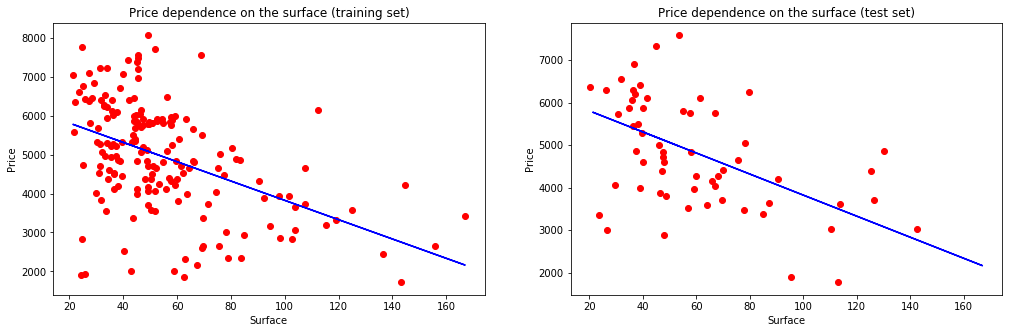

In [168]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.2) # space between plots

# visualising the training test results
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price dependence on the surface (training set)')
plt.xlabel('Surface')
plt.ylabel('Price')

# visualising the test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # trend line is the same as above because I want to see
#how far are predicted values from trend line
plt.title('Price dependence on the surface (test set)')
plt.xlabel('Surface')
plt.ylabel('Price')


plt.show()

In [169]:
# The above graphs show that there is a correlation between surface and price (the higher surface, the lower price), 
# but there are also other factors that infulence the price for egg. location, standard etc. That's why predictions 
# are not very accurate

# 3. Multiple Linear Regression

In [3]:
import pandas as pd
startups=pd.read_csv(
'/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part2-Regression/Section5-MultipleLinearRegression/50_Startups.csv')

In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# In this exercise I will check the impact of R&D Spend, Administration Spend, Marketing Spend and State on the profits

In [6]:
# choosing features
X=startups.iloc[:,0:4]
# choosing predicting target
y=startups.iloc[:,-1]

In [7]:
# encoding categorical data (X)
# encoding independent value (y)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
Labelencoder_X=LabelEncoder()
X.iloc[:,3]=Labelencoder_X.fit_transform(X.iloc[:, 3]) # column 'State'-change states' names to numbers
onehotencoder=OneHotEncoder(categorical_features=[3]) # making Dummy Variables to column 'state'
X=onehotencoder.fit_transform(X).toarray()

In [8]:
# avoiding the Dummy Variable Trap. Actually we don't have to do it as the library will do it for us
X=X[:, 1:] 

In [9]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=0)

In [10]:
# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# making prediction
y_pred=regressor.predict(X_test)

In [12]:
# comparison of real and predicted profits
real_profits=y_test.reset_index(drop=True)
predicted_profits=pd.Series(y_pred, name='Predicted_profit')
comparison=pd.concat([real_profits,predicted_profits], axis=1)
comparison.head()

,Profit,Predicted_profit
0,103282.38,104440.725826
1,144259.40,132253.815677
2,146121.95,132872.071743
3,77798.83,71707.787714
4,191050.39,178678.993499


### Building the optimal model using Backward Elimination

In [13]:
import statsmodels.formula.api as sm
# appending a column with constant value
X=np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1) # 50 rows, 1 column

In [14]:
# creating the optimal matrix of features (contains only features that are statistically siginificant)
X_opt=X[:,[0,1,2,3,4,5]] # choosing indexes of features that are going to be considered
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [15]:
regressor_OLS.summary()
#x1- dummy variable (State)
#x2- dummy variable (State)
#x3- R&D Spend
#x4- Administration
#x5- Marketing Spend
# the statistic shows that the highest P-value has x2(0,990) so I have to remove it in next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        18:57:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# removing feature with the highest P-value (x2)
X_opt=X[:,[0,1,3,4,5]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [17]:
regressor_OLS.summary()
#x1- dummy variable (State)
#x2- R&D Spend
#x3- Administration
#x4- Marketing Spend
# the statistic shows that the highest P-value has x1(0,940) so I have to remove it in next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.49e-29
Time:                        18:57:39   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# removing feature with the highest P-value
X_opt=X[:,[0,3,4,5]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [19]:
regressor_OLS.summary()
#x1- R&D Spend
#x2- Administration
#x3- Marketing Spend
# the statistic shows that the highest P-value has x2(0,600) so I have to remove it in next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        18:57:42   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_opt=X[:,[0,3,5]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [21]:
regressor_OLS.summary()
#x1- R&D Spend
#x2- Marketing Spend
# the statistic shows that the highest P-value has x2(0,06). 
# It is really close to the statistically significant value(P<0,05) so I can decude to leave it or remove
# For the purpose of this exercise (backward elimination) I will remove it

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        18:57:49   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_opt=X[:,[0,3]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.50e-32
Time:                        18:57:53   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_opt1=X[:,3]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_opt, y, random_state=0)
y_train = y_train.values.reshape(-1,1)
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set

y_pred_opt=regressor.predict(X_test)

In [25]:
y_pred_opt

array([[104560.72466151],
       [134156.63684656],
       [135217.63082962],
       [ 71940.15211233],
       [179267.6454832 ],
       [109737.87468807],
       [ 65389.01521965],
       [100358.92792475],
       [111350.97673001],
       [169578.4243176 ],
       [ 95535.39411668],
       [ 87431.30370649],
       [112491.63587783]])

In [34]:
# y_pred_opt is two dimensional array. I change it into one dimensional
y_pred_opt=np.concatenate(y_pred_opt)

In [35]:
y_pred_opt

array([104560.72466151, 134156.63684656, 135217.63082962,  71940.15211233,
       179267.6454832 , 109737.87468807,  65389.01521965, 100358.92792475,
       111350.97673001, 169578.4243176 ,  95535.39411668,  87431.30370649,
       112491.63587783])

In [36]:
# comparison of real and predicted profits received with and without Backward Elimination
real_profits=y_test.reset_index(drop=True)
predicted_profits_without_BE=pd.Series(y_pred, name='Predicted profit without Backward Elimination')
predicted_profits_with_BE=pd.Series(y_pred_opt, name='Predicted profit with Backward Elimination')
comparison=pd.concat([real_profits,predicted_profits_without_BE,predicted_profits_with_BE], axis=1)
comparison.head()
# Comparison shows that in this case predicted profits are w bit more accurate when using Backward Elimination

,Profit,Predicted profit without Backward Elimination,Predicted profit with Backward Elimination
0,103282.38,104440.725826,104560.724662
1,144259.40,132253.815677,134156.636847
2,146121.95,132872.071743,135217.630830
3,77798.83,71707.787714,71940.152112
4,191050.39,178678.993499,179267.645483
